### PCA(Principal Component Analysis)

#### 1. 데이터 전처리 및 데이터 파악

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
# 독립변수 중 처음 2개만 사용
x = iris.data[:, [0, 2]]
y = iris.target

In [4]:
print(x.shape)
feature_names = [iris.feature_names[0], iris.feature_names[2]]
feature_names

(150, 2)


['sepal length (cm)', 'petal length (cm)']

In [5]:
df_x = pd.DataFrame(x)
df_x.head(2)

,0,1
0,5.1,1.4
1,4.9,1.4


In [6]:
print(y.shape)
df_y = pd.DataFrame(y)
df_y.head(2)

(150,)


,0
0,0
1,0


In [8]:
# 결측치 파악
df_x.isnull().sum()

0    0
1    0
dtype: int64

In [9]:
df_y.isnull().sum()

0    0
dtype: int64

In [10]:
# df_y의 데이터 종류? 파악
set(y)

{0, 1, 2}

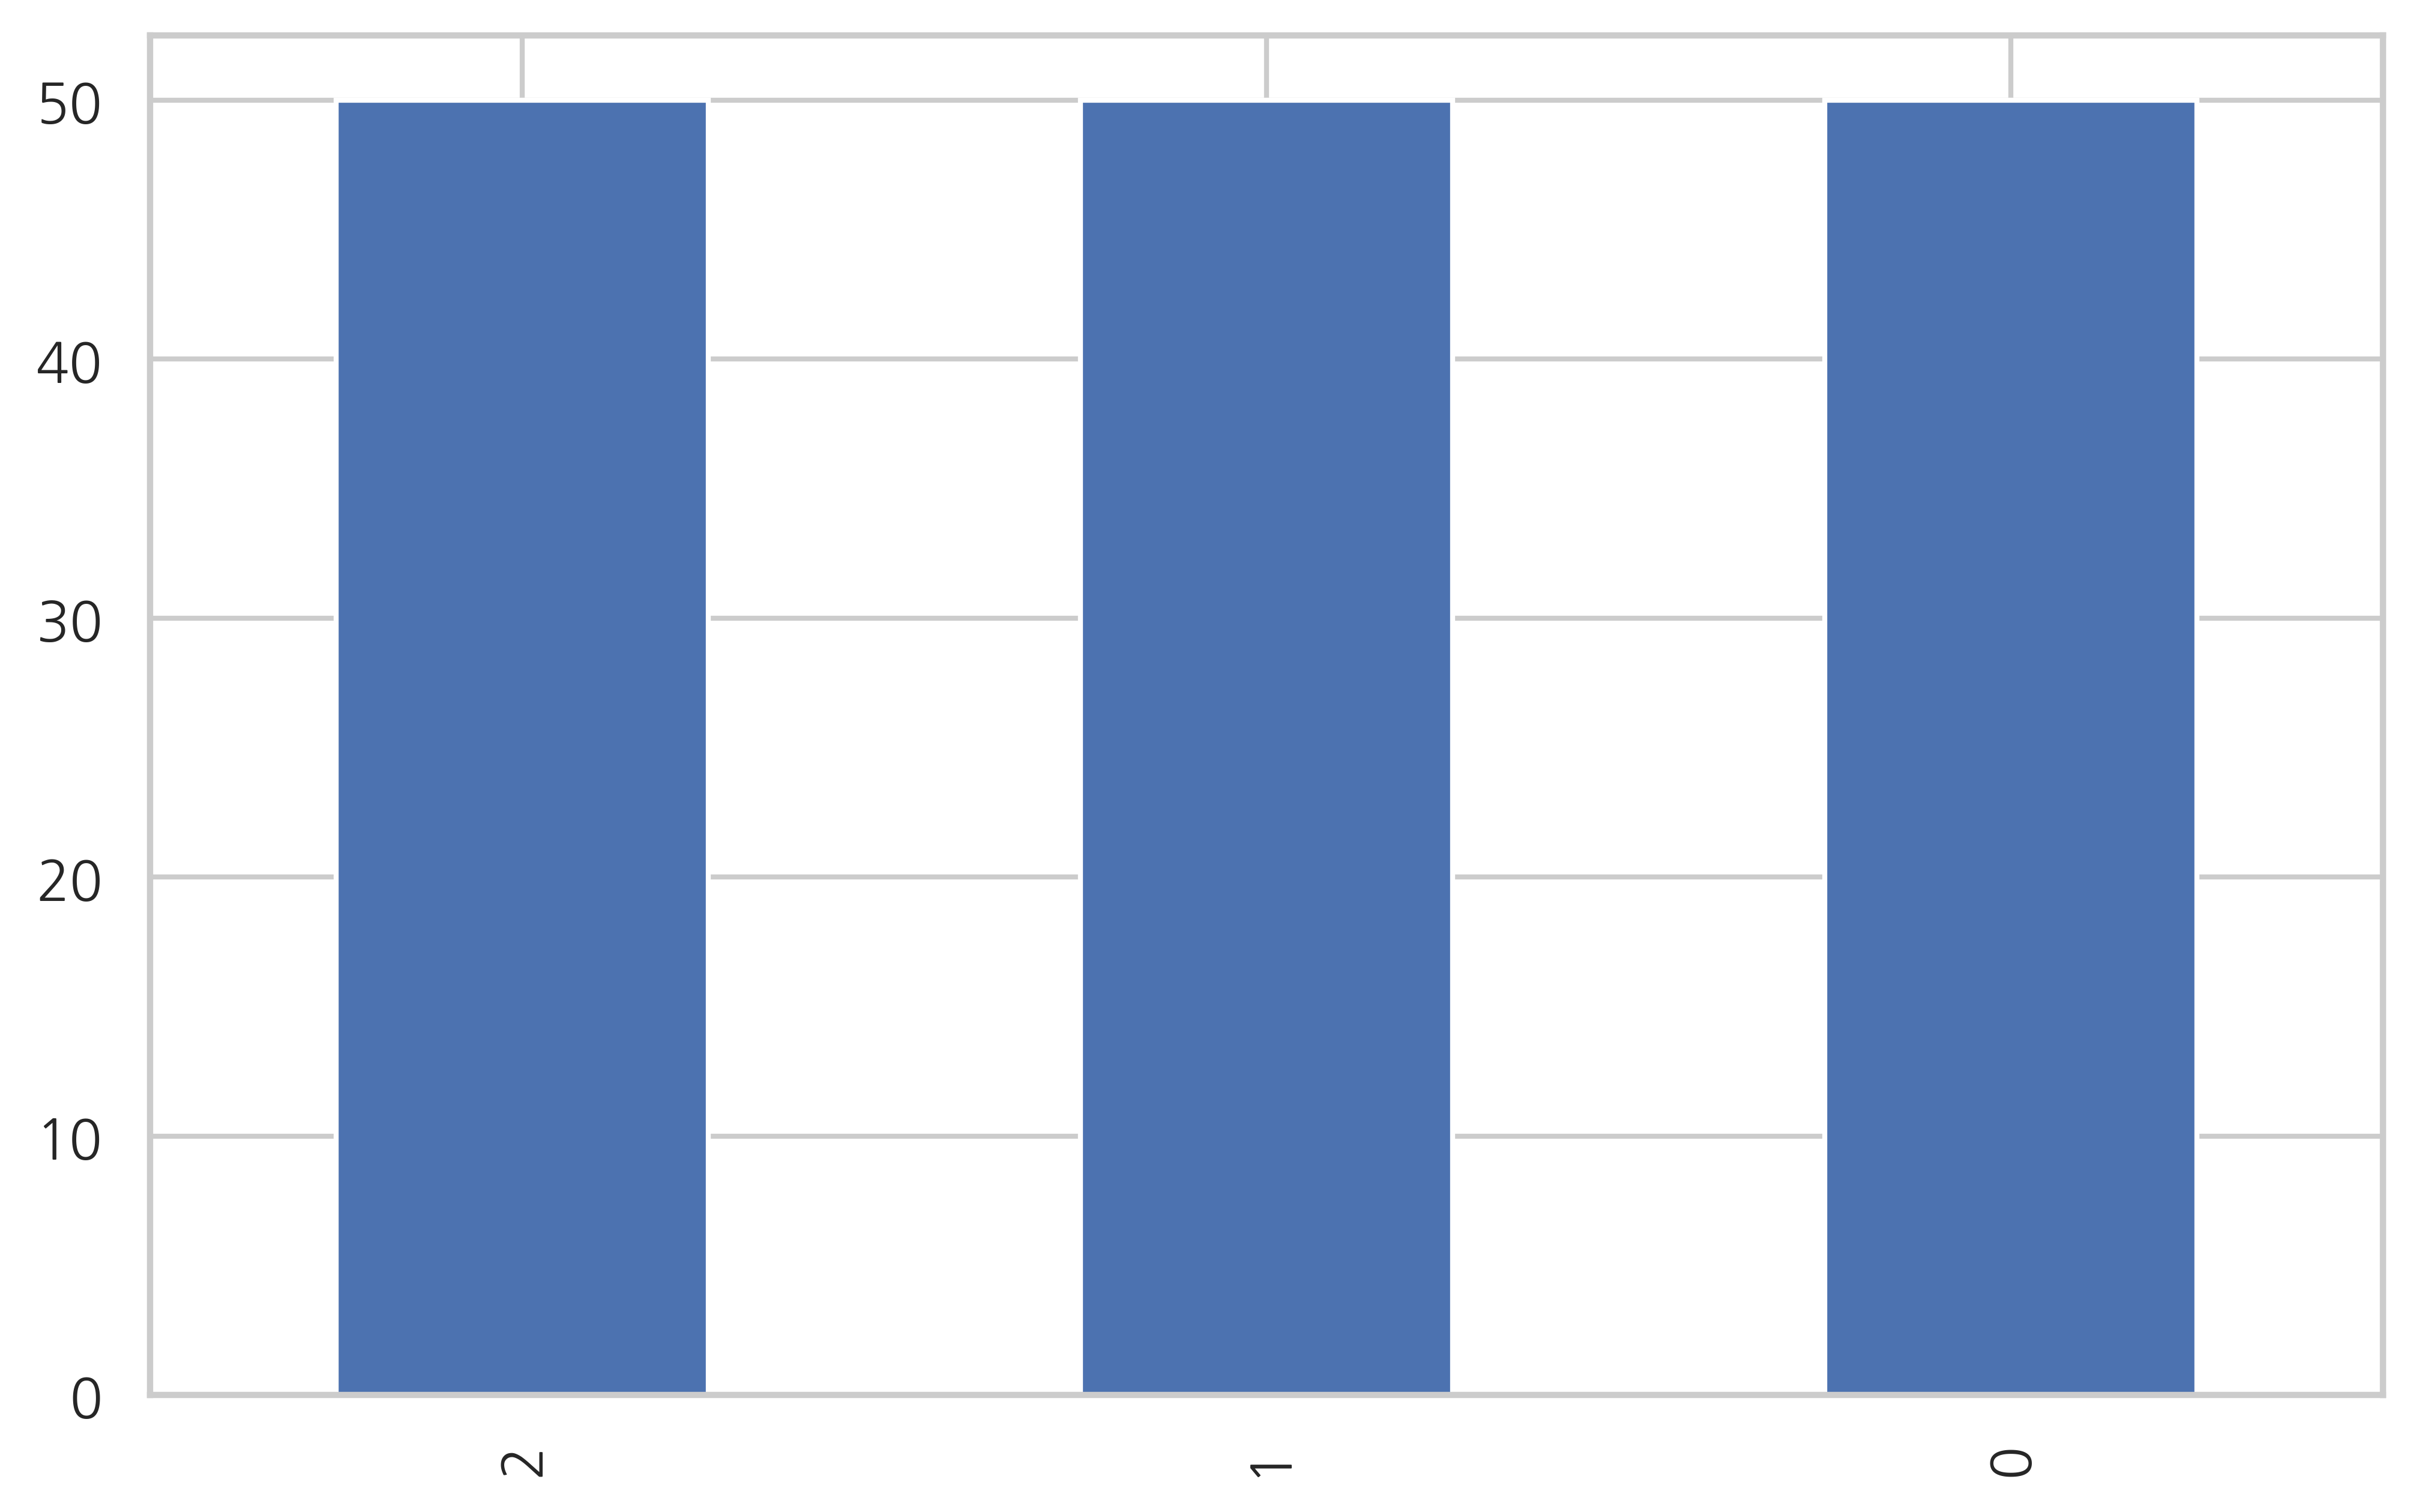

In [11]:
# 종속변수 Y 의 분포
df_y[0].value_counts().plot(kind='bar')
plt.show()

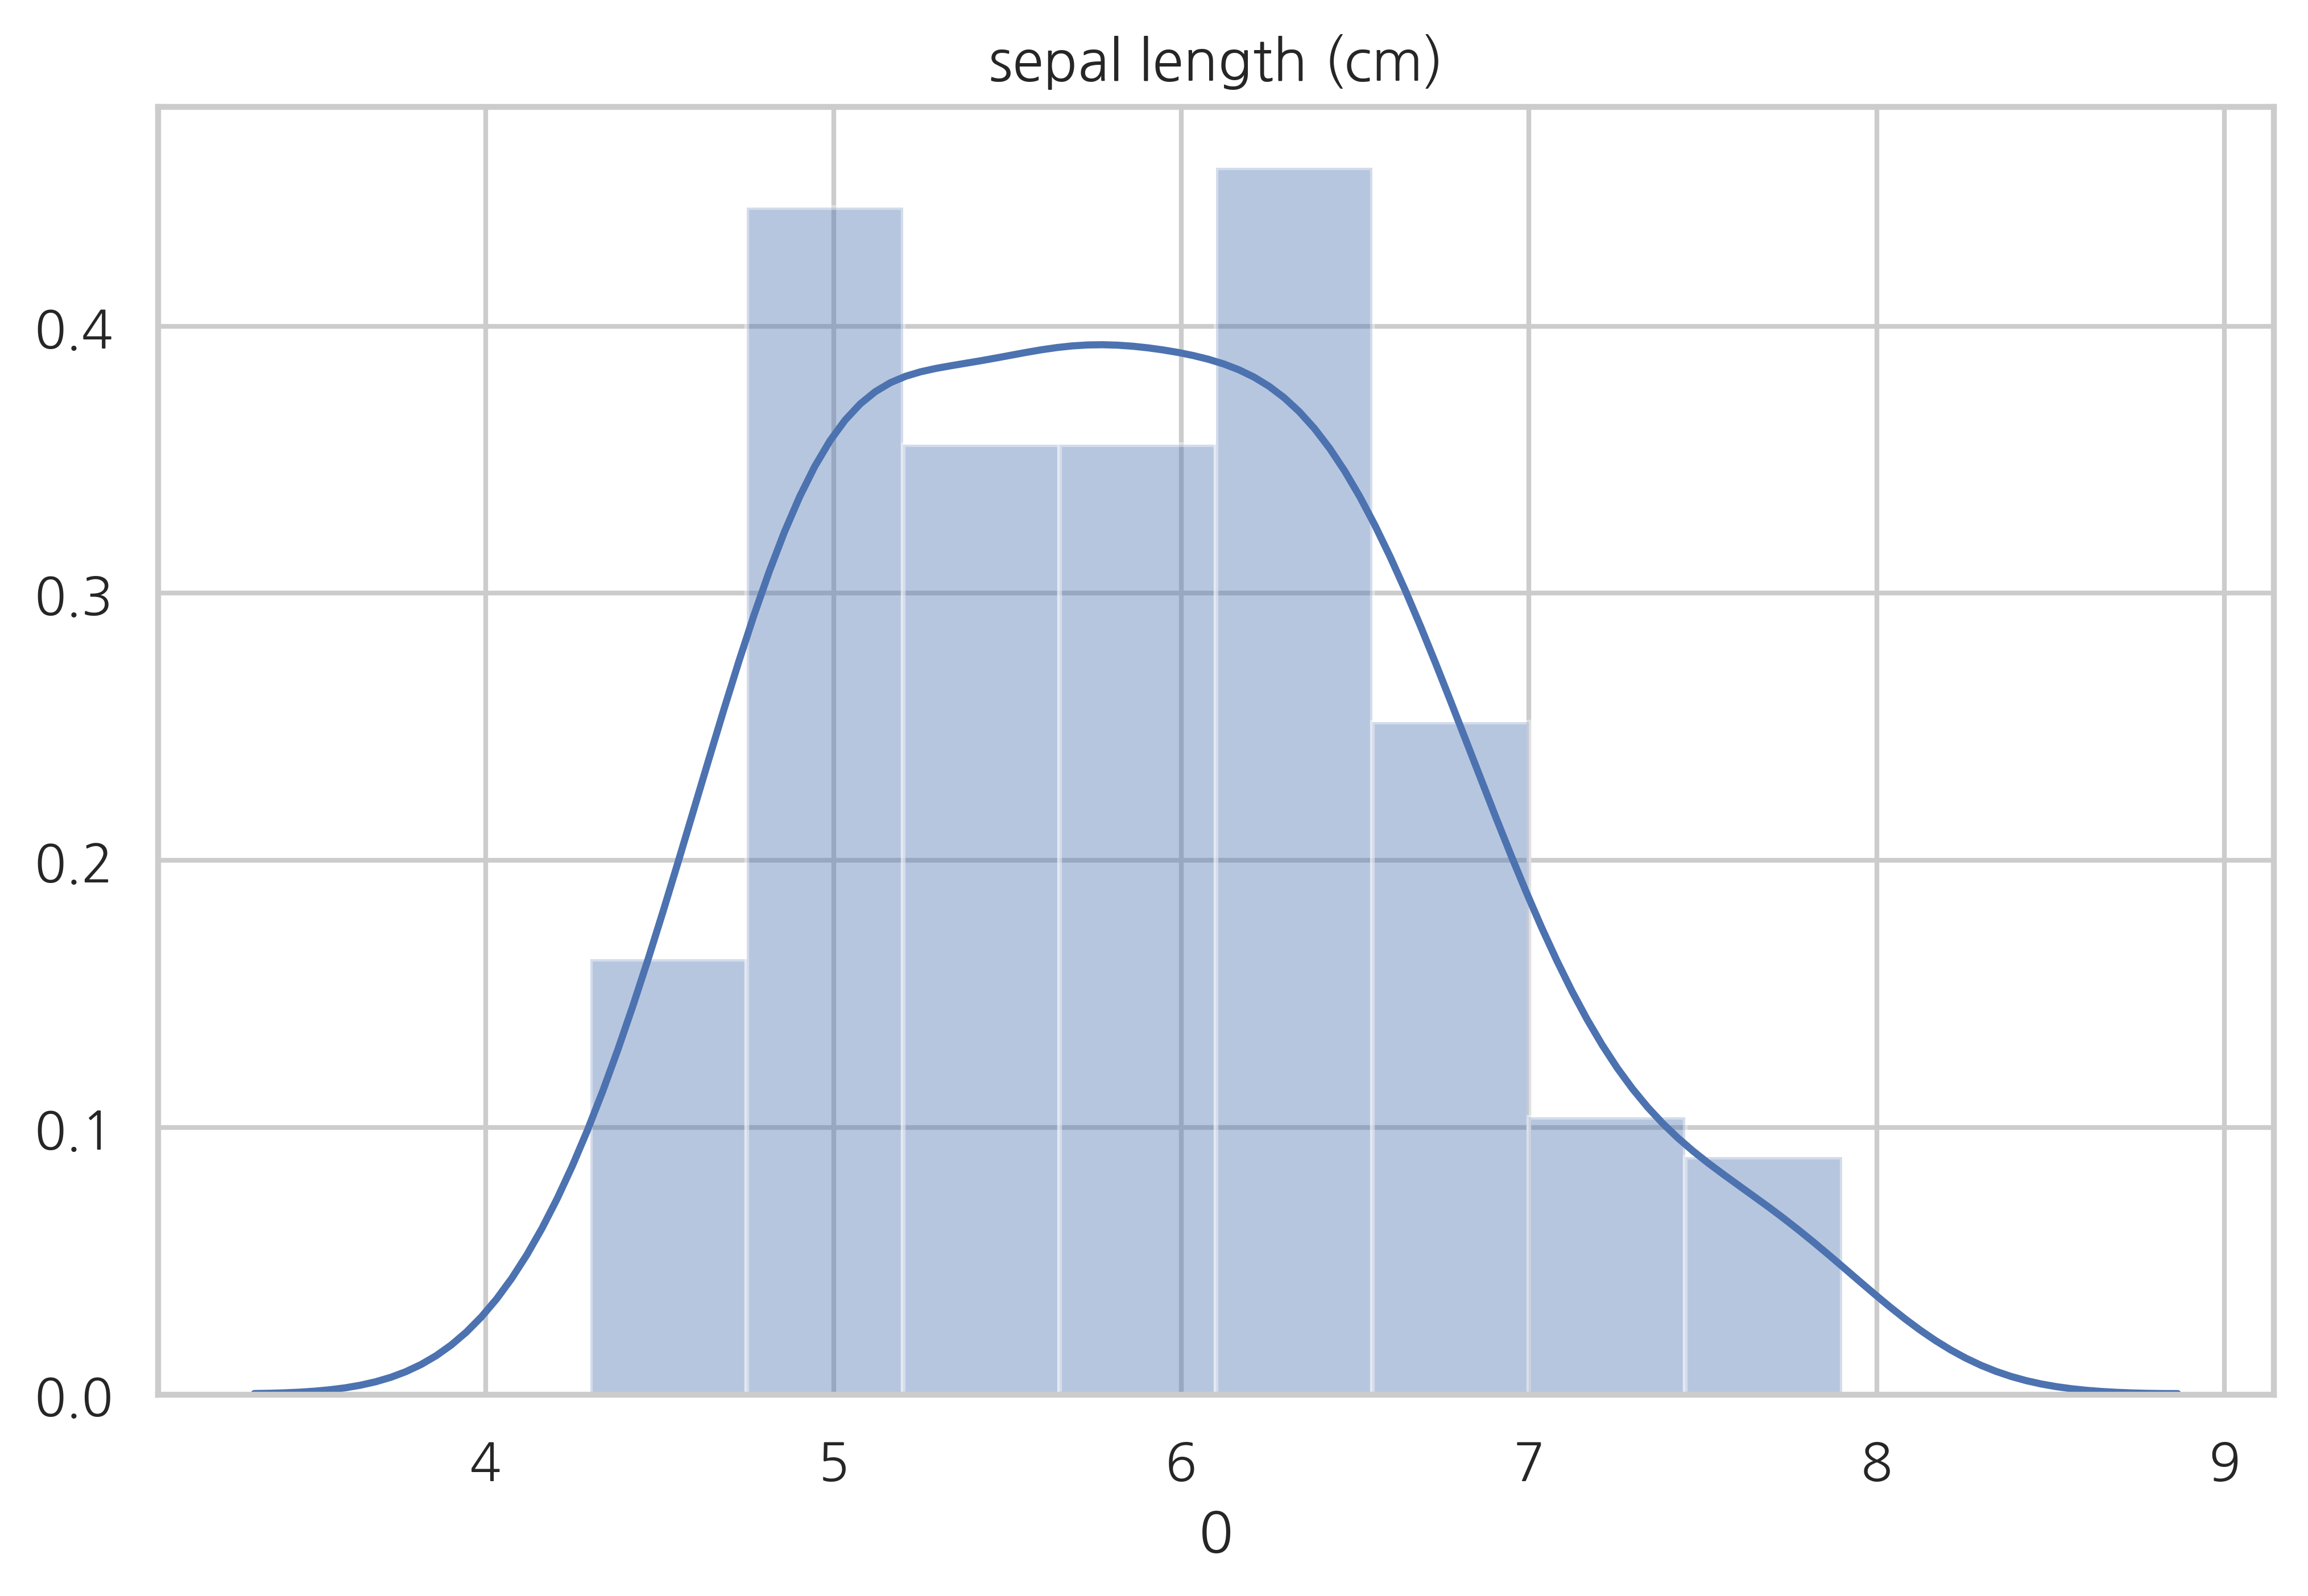

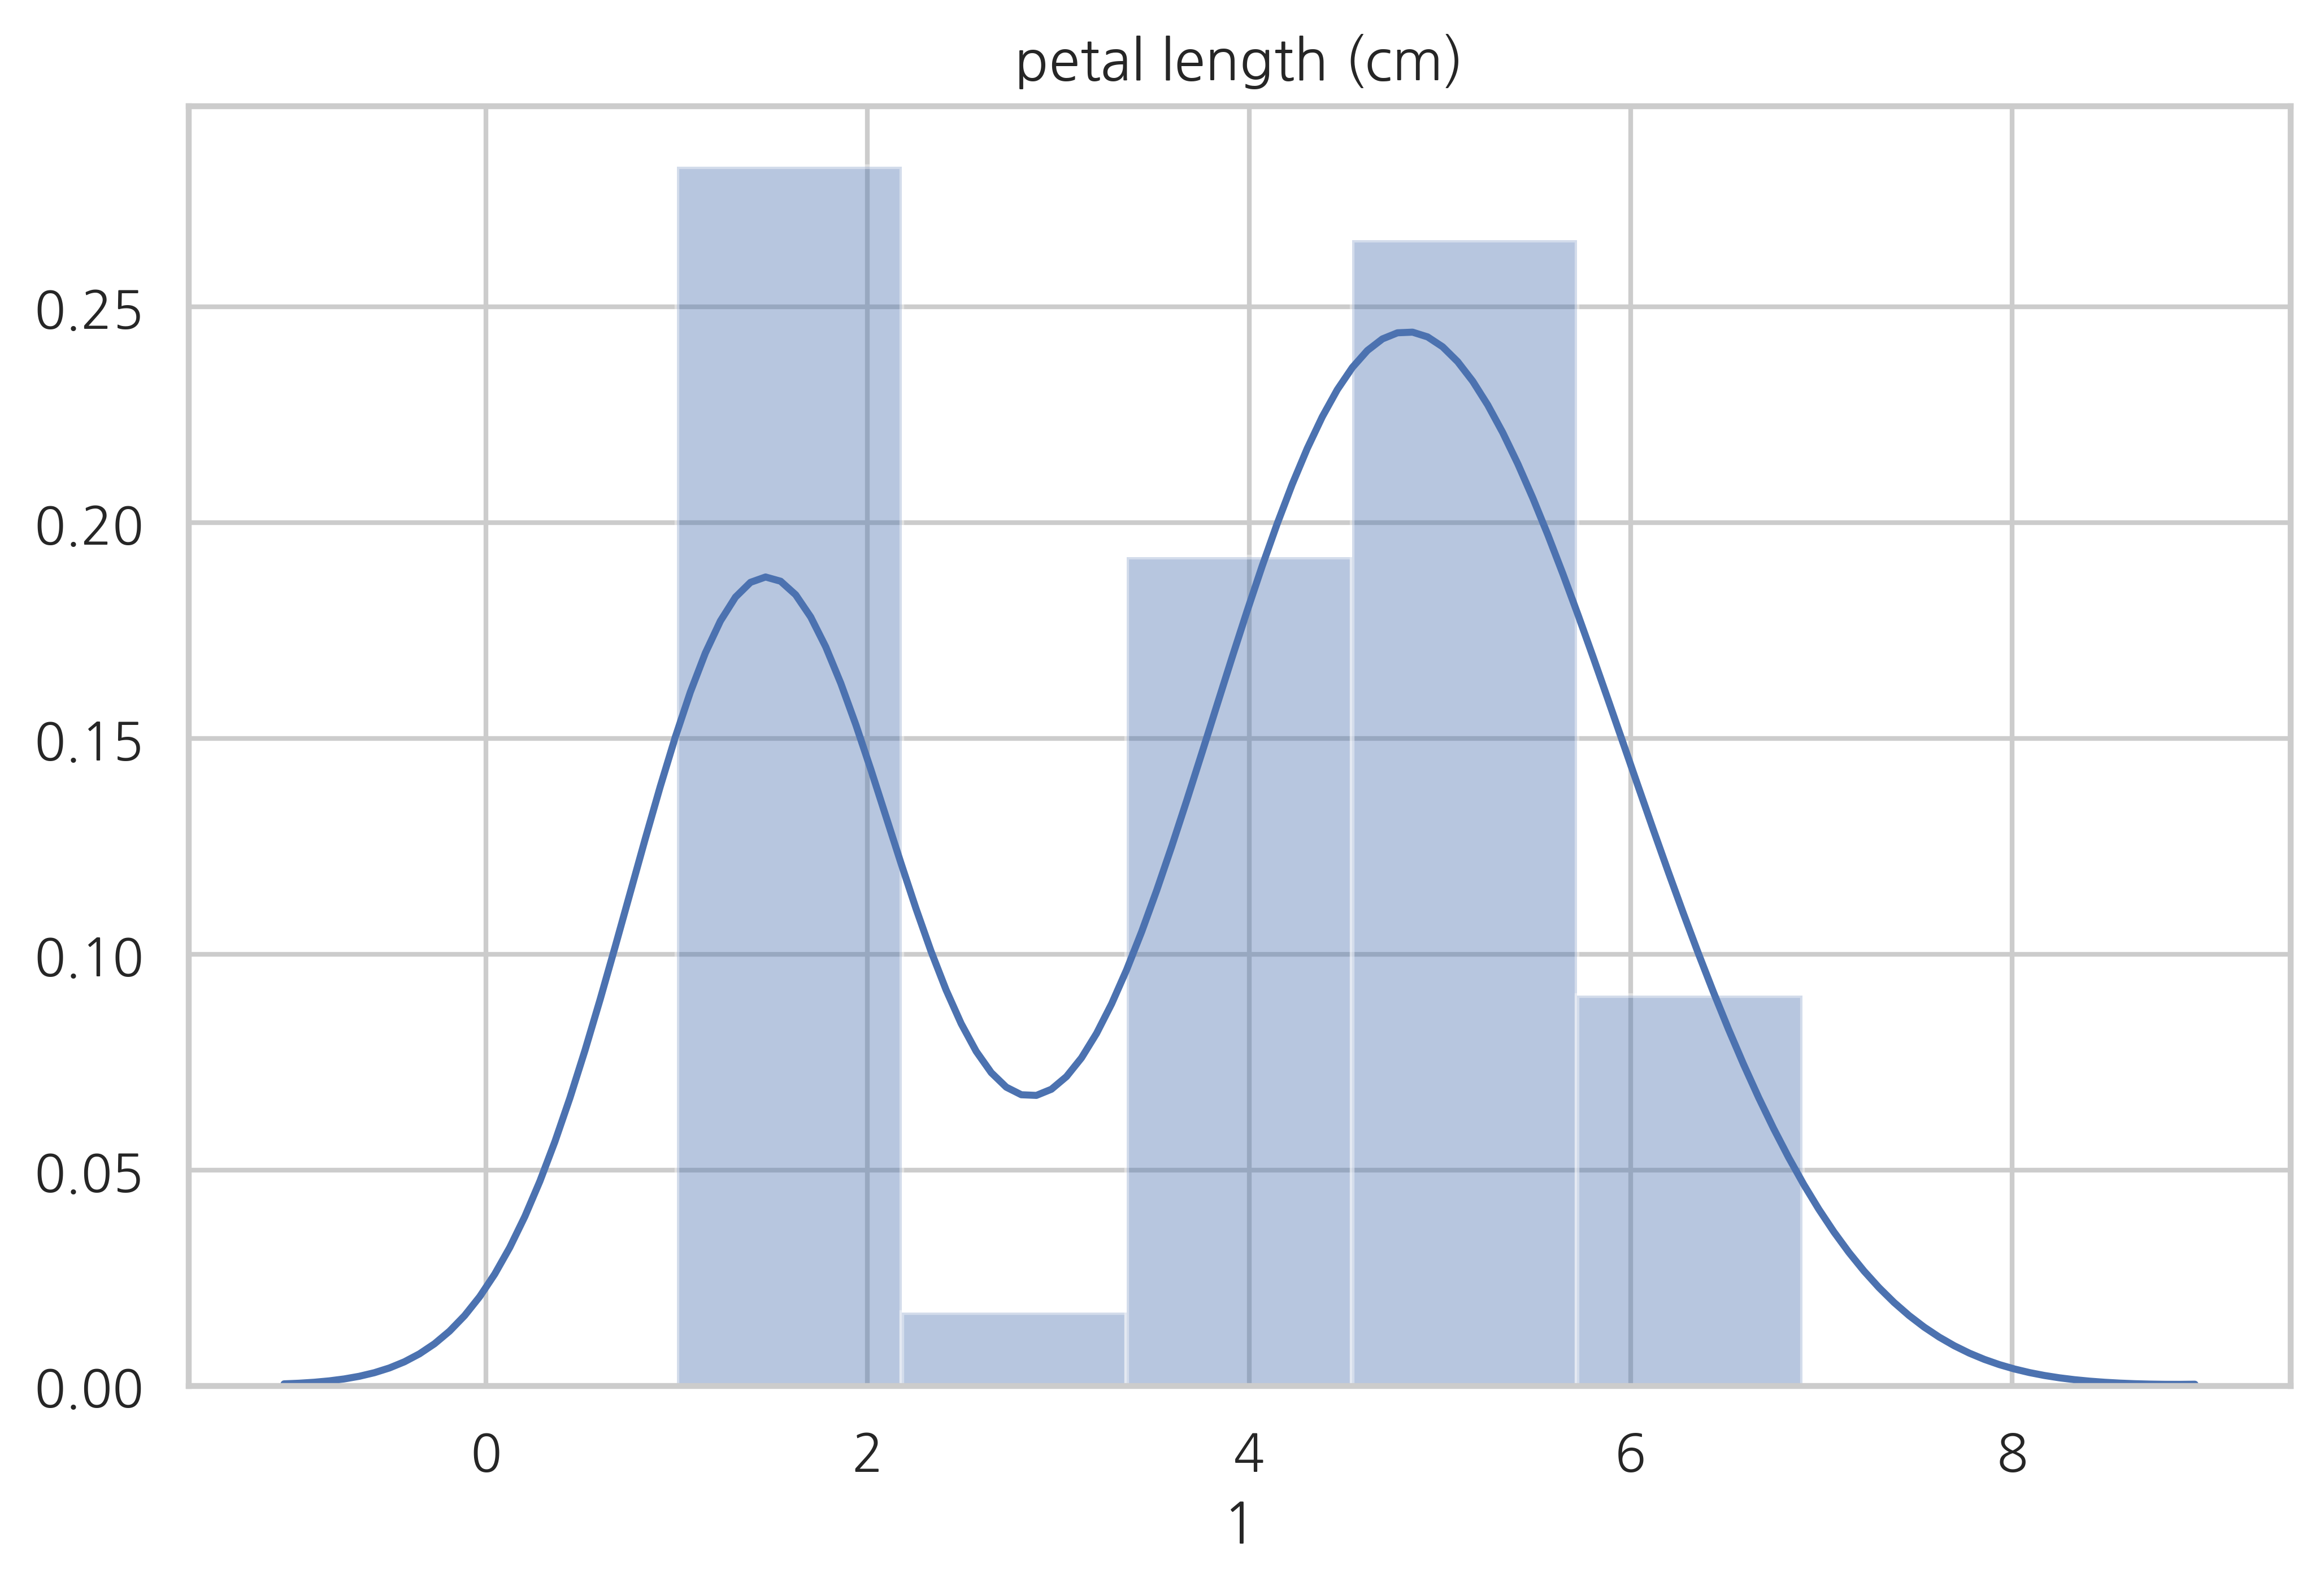

In [12]:
# 독립변수 X의 분포 
for i in range(df_x.shape[1]):
    sns.distplot(df_x[i])
    plt.title(feature_names[i])
    plt.show()

#### 2. PCA 함수 활용 및 output 의미 파악

In [13]:
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
# 고유벡터
pca.components_

array([[ 0.39360585,  0.9192793 ],
       [-0.9192793 ,  0.39360585]])

In [15]:
# 고윳값
pca.explained_variance_

array([3.66189877, 0.1400726 ])

In [16]:
# PC Score
PCscore = pca.transform(x)
PCscore[:5]

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [17]:
eigen_v = pca.components_.T
eigen_v
# 행이 각각의 변수, 열이 각각의 고유벡터가 되도록 transpose 시켜줘야 함

array([[ 0.39360585, -0.9192793 ],
       [ 0.9192793 ,  0.39360585]])

In [18]:
# Centering
mx = np.matrix(x)
for i in range(x.shape[1]):
    mx[:, i] = mx[:, i] - np.mean(x[:, i])
df_mx = pd.DataFrame(mx)

In [19]:
(mx * eigen_v)[:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

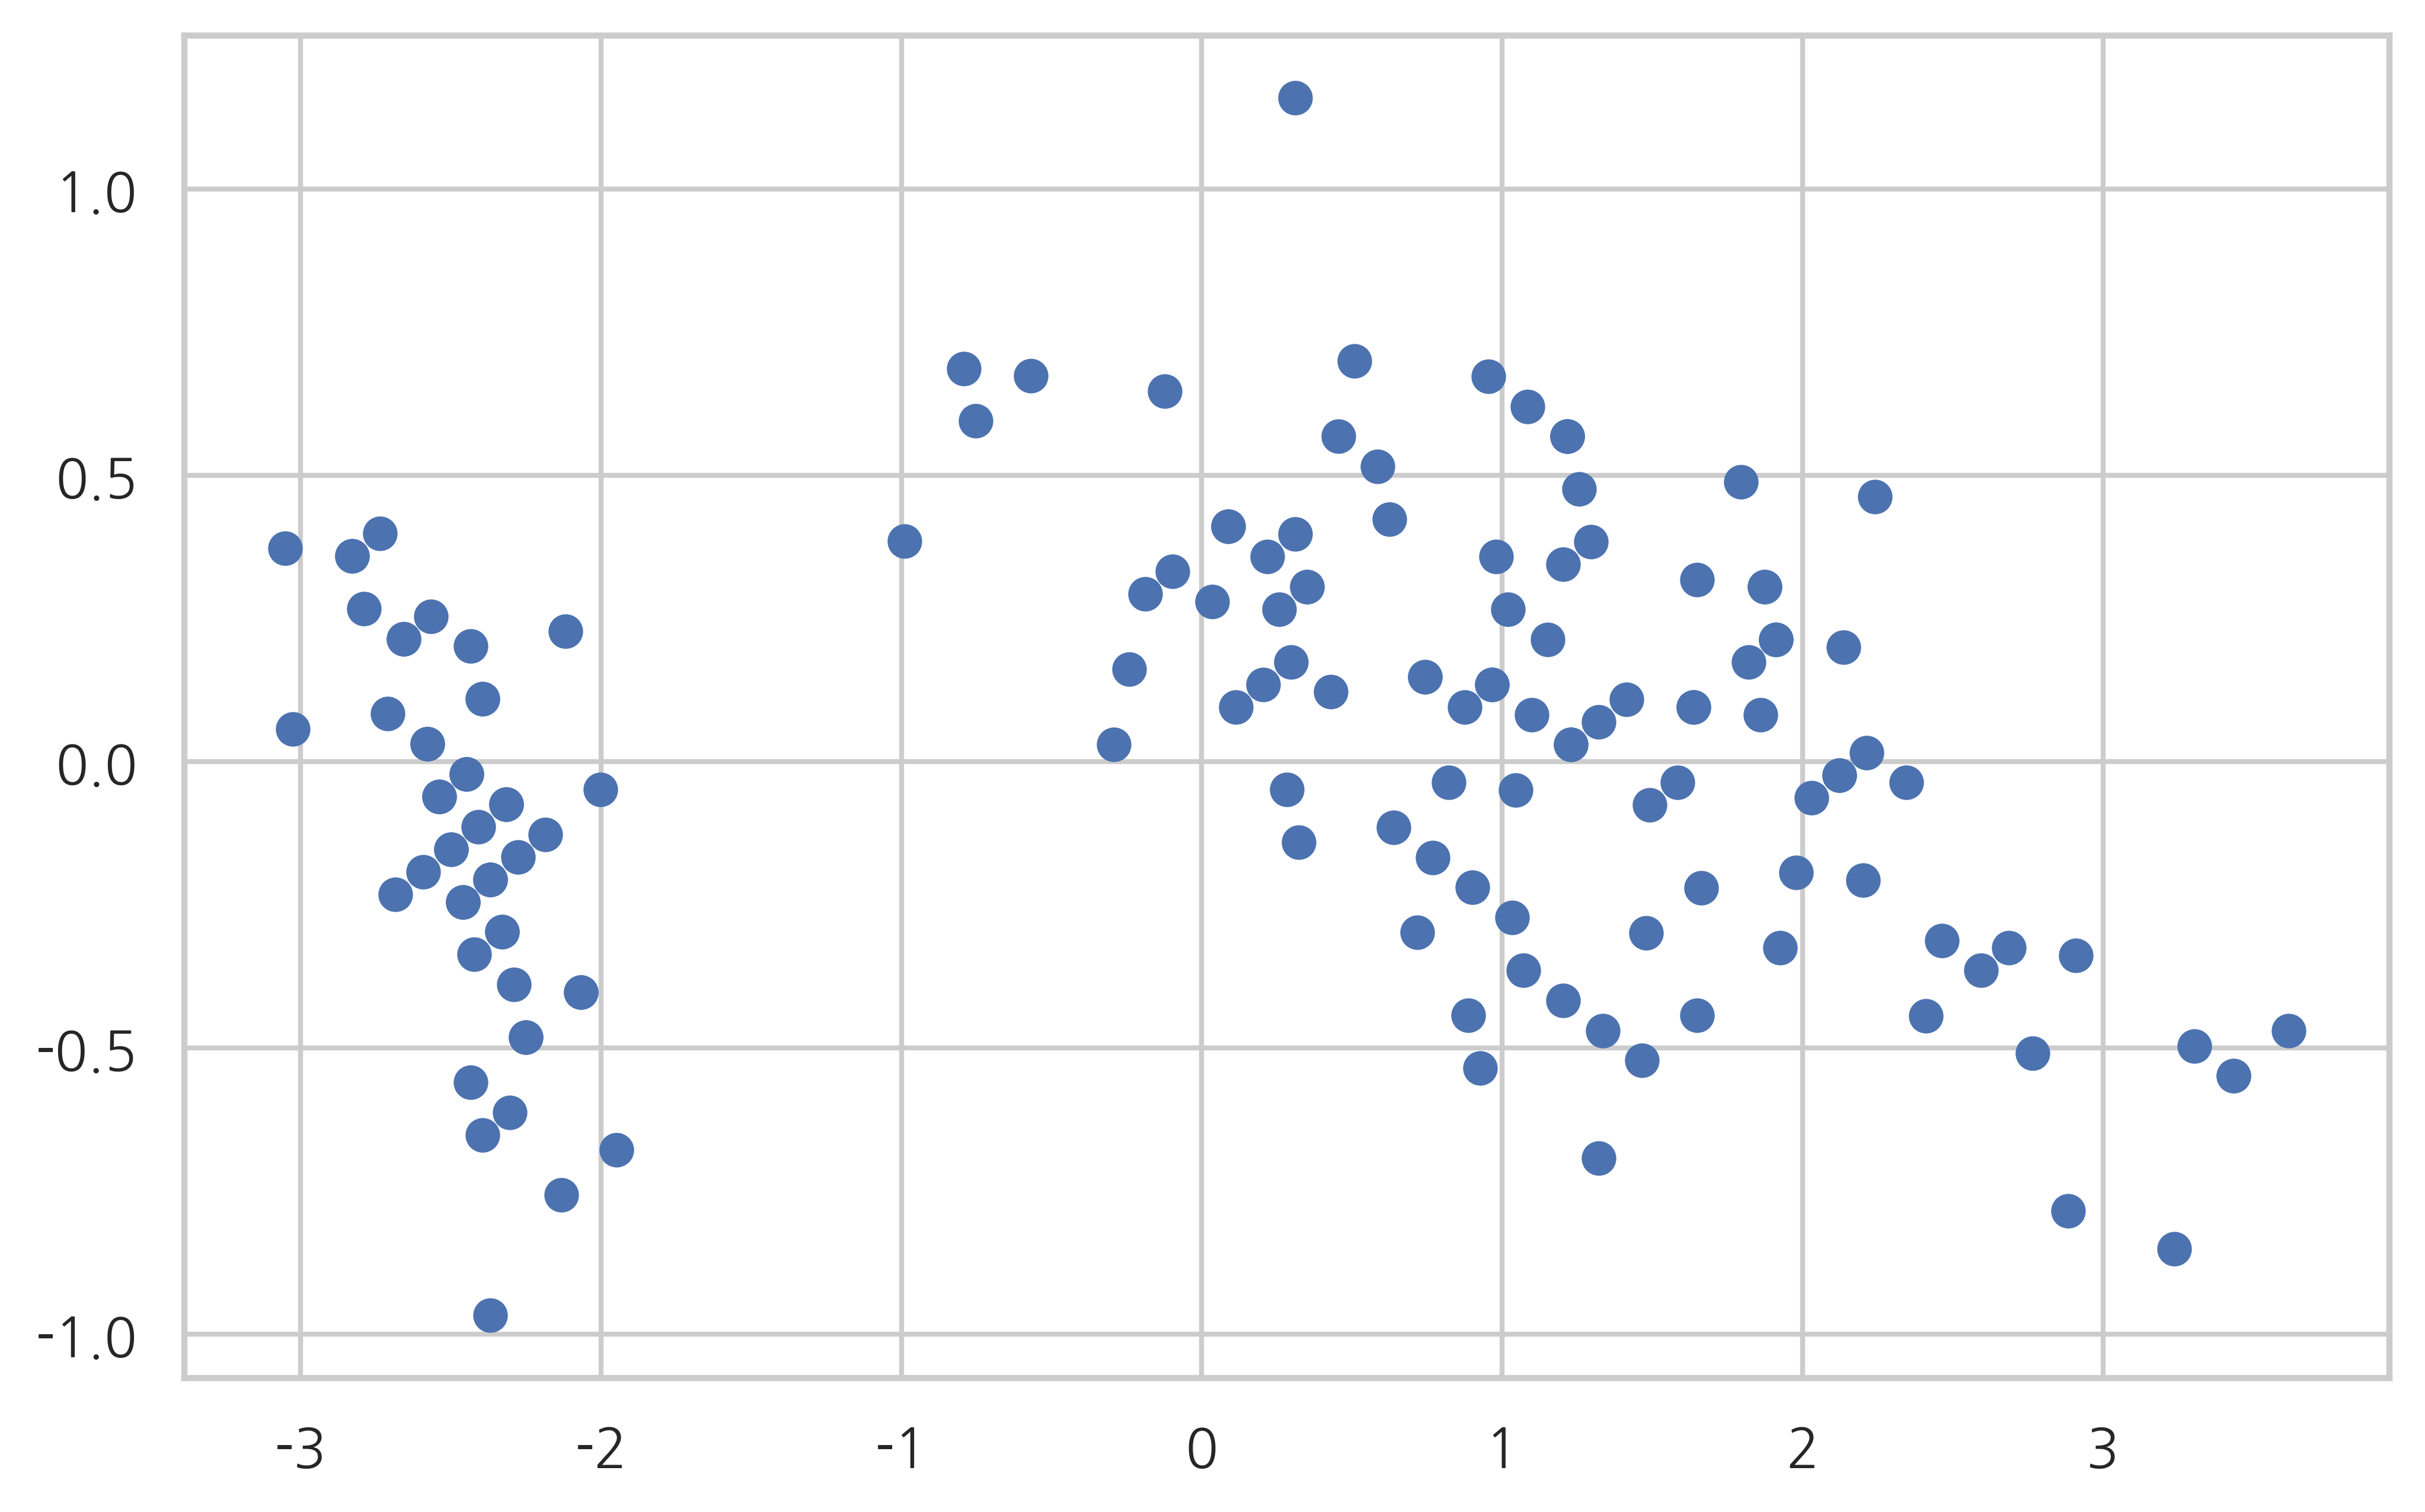

In [20]:
plt.scatter(PCscore[:, 0], PCscore[:, 1])
plt.show()
# 축이 바뀐 PC Score

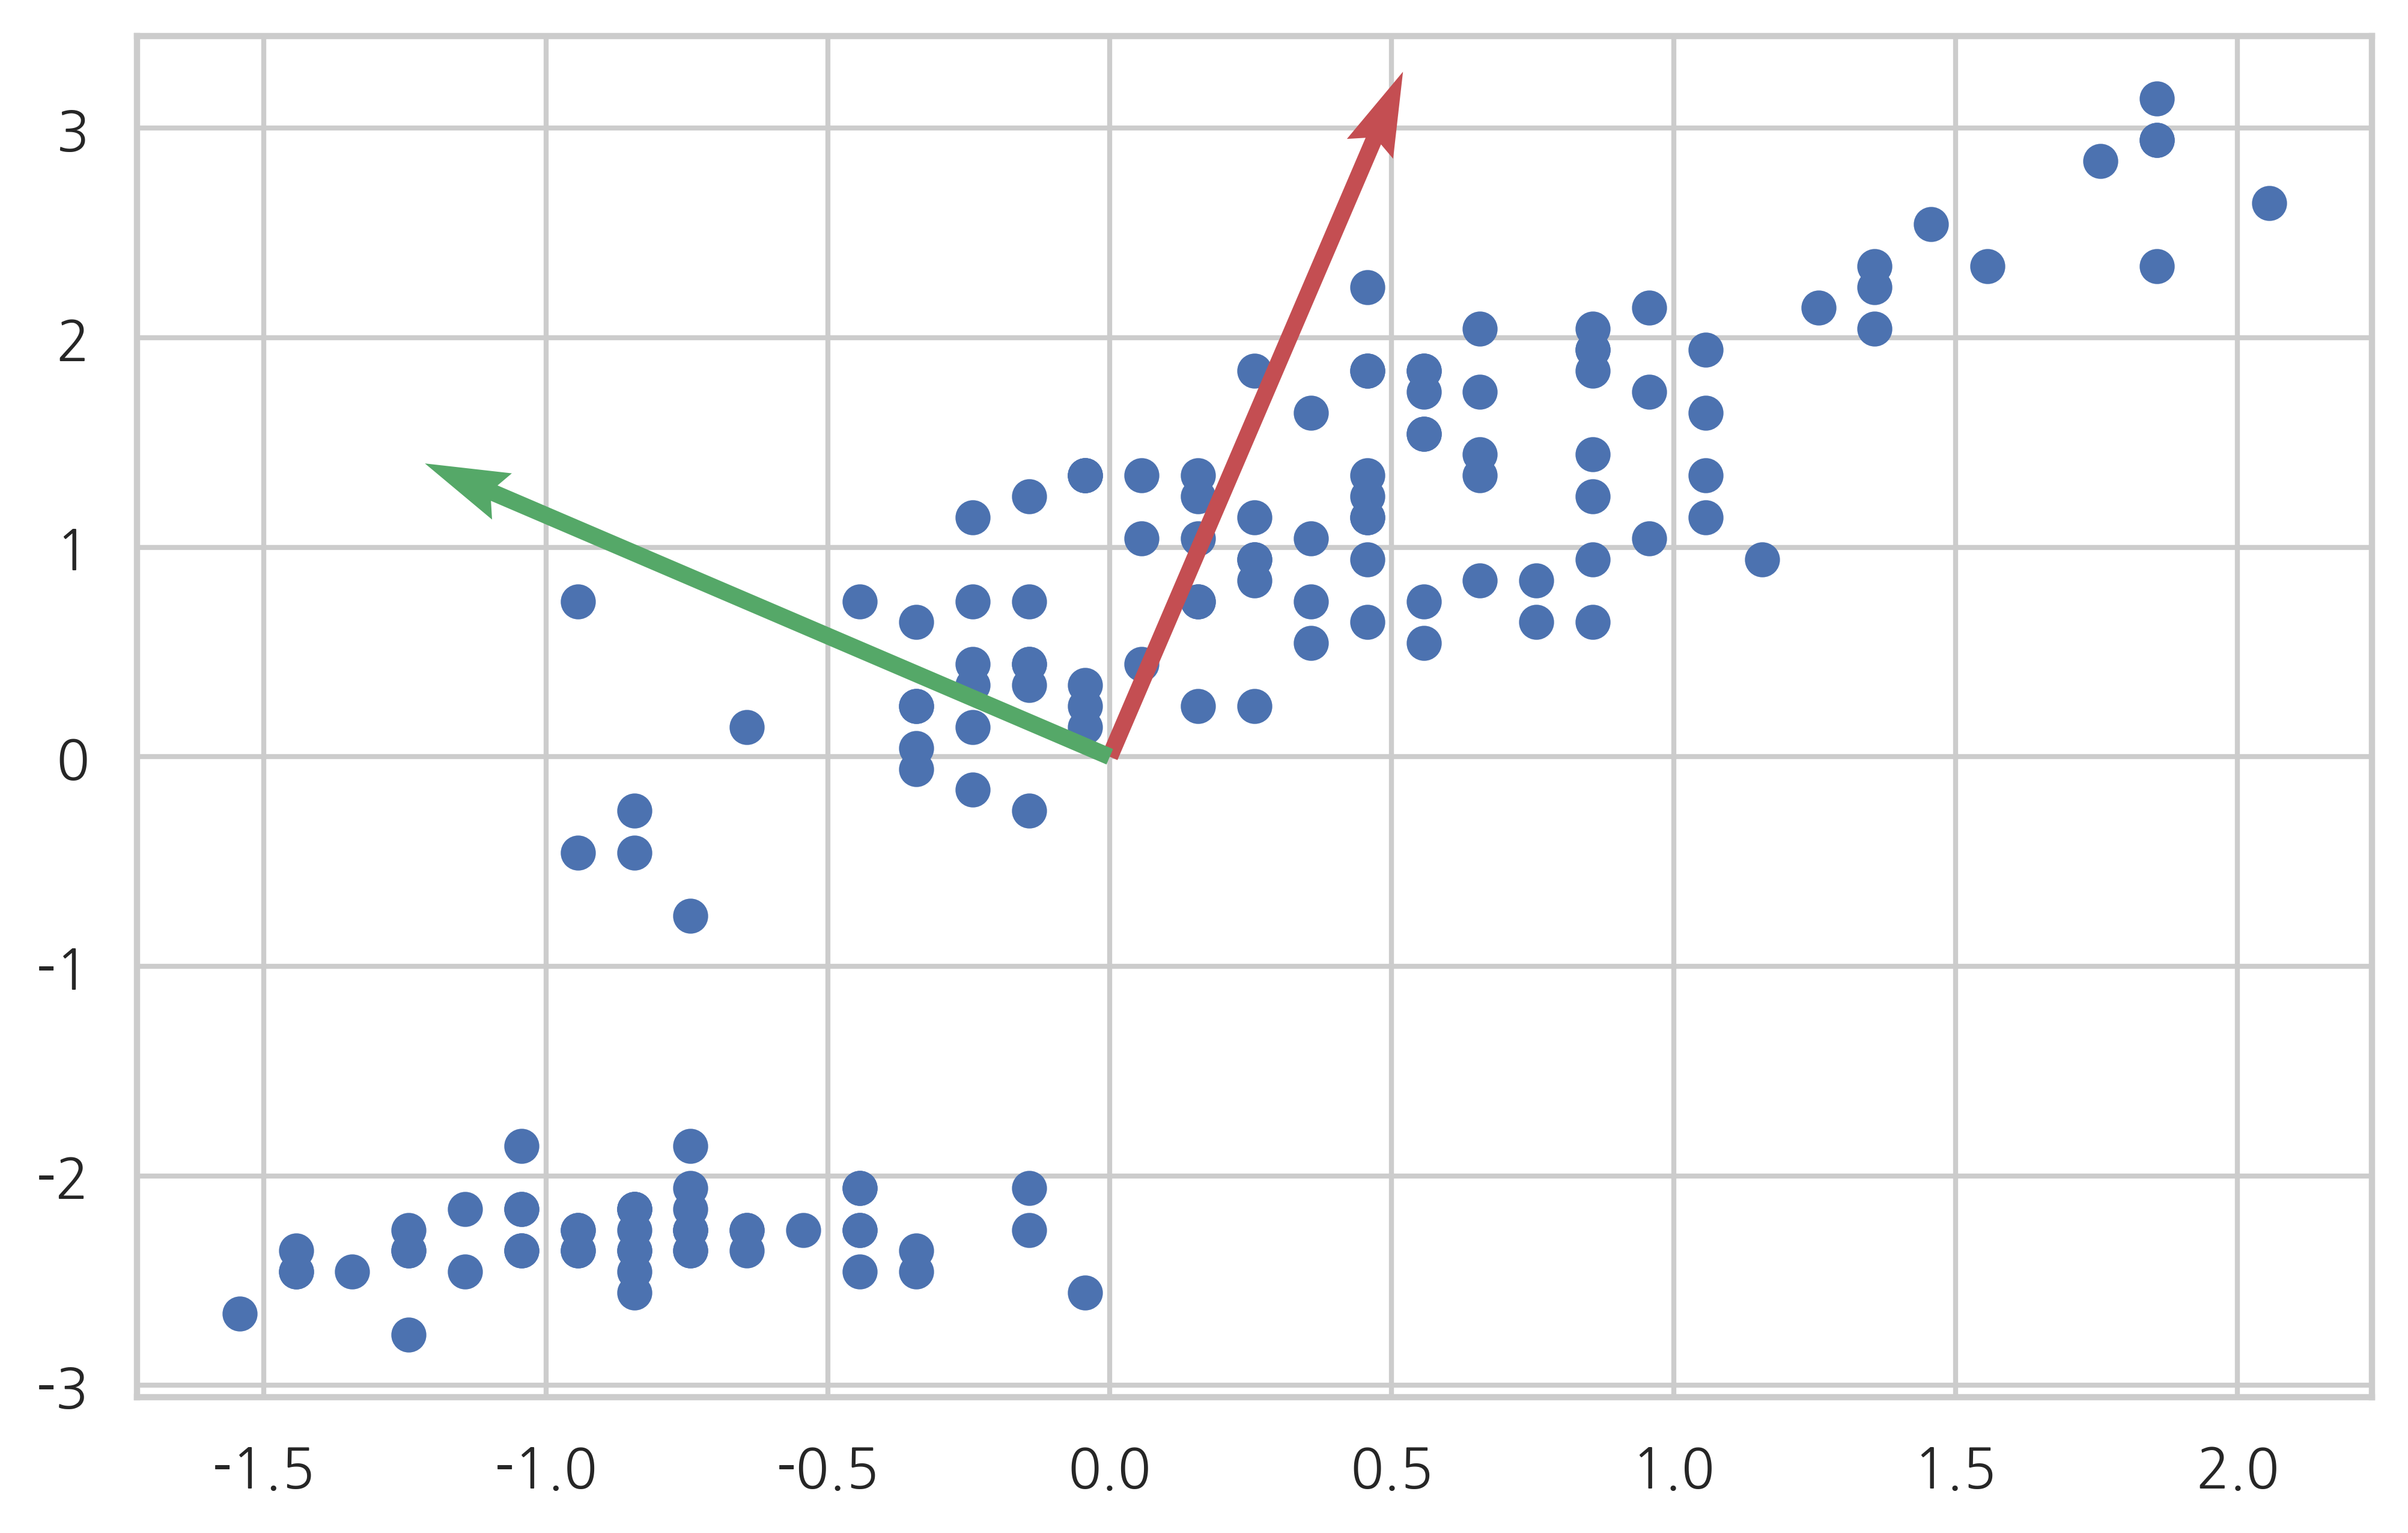

In [23]:
plt.scatter(df_mx[0], df_mx[1])
origin = [0], [0]
plt.quiver(*origin, eigen_v[0, :], eigen_v[1, :], color=['r', 'g'], scale=3)
plt.show()
# 원래의 데이터, 화살표는 새로운 축을 의미

#### 3. PC를 활용한 회귀분석
- 모든 독립변수를 활용하여 PC 뽑아내기

In [24]:
x2 = iris.data
pca2 = PCA(n_components=4)
pca2.fit(x2)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [26]:
PCs = pca2.transform(x2)[:, 0:2]
PCs[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [28]:
clf = LogisticRegression(solver='sag', multi_class='multinomial').fit(x2, y)
# 모델의 복잡성으로 기존 자료를 이용한 분석은 수렴하지 않는다

In [29]:
clf2 = LogisticRegression(solver='sag', multi_class='multinomial').fit(PCs, y)
# PC 2개만을 뽑아내어 분석한 경우 모델이 수렴

In [30]:
confusion_matrix(y, clf2.predict(PCs))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)

In [32]:
clf3 = LogisticRegression(solver='sag', max_iter=1000, random_state=0, multi_class='multinomial').fit(x2[:, 0:2], y)
# 임의로 변수 2개만을 뽑아내어 분석한 경우 모델의 퍼포먼스가 하락함

In [34]:
confusion_matrix(y, clf3.predict(x2[:, 0:2]))

array([[49,  1,  0],
       [ 0, 37, 13],
       [ 0, 14, 36]], dtype=int64)

In [ ]:
# 차원축소를 통하여 모델의 복잡성을 줄이는 동시에 최대한 많은 정보를 활용하여 분석할 수 있다